<a href="https://colab.research.google.com/github/Baridwan01/Posttest2Datmin/blob/main/2109116036_Zaki_Baridwan_Sauqi_Posttest2_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Baridwan01/Posttest2Datmin/main/Dataset/dataset_market_basket_apriori.csv")
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.sum() # menghitung jumlah nilai di setiap kolom

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [4]:
df.columns # mengetahui kolom apa saja yang ada pada dataset

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [5]:
from itertools import permutations #Library untuk buat kombinasi barang
rules = list(permutations(df.columns, 2)) # untuk menyimpan seluruh kemungkinan kombinasi barang
rules # untuk menampilkan keseluruhan hasil kombinasi

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [6]:
# Menghitung kemunculan kombinasi yang ada pada dataset
rule_baru = [] # Menyimpan data dalam bentuk list
for rule in rules: # Mengulangi pembacaan dataset
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0: # Menentukan apakah kombinasi tersebut ada atau tidak
    rule_baru.append(rule) # Menyimpan hasil pengecekan dalam bentuk tuple didalam list
rule_baru # Menampilkan hasil

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

In [7]:
hitung = {} # Menyimpan data dalam bentuk dictionary
for rule in rule_baru:  # Mengulangi pembacaan dataset
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1) # Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
      ])
  hitung[str(rule)] = banyak_data # Menambahkan hasil penentuan ke dalam dictionary
hitung # Menampilkan hasil

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [8]:
# Melihat banyak transaksi
len(df)

19

In [9]:
# List support
# 
for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  print(f"{item} support = {ab/len(df)*100}%") # Menghitung support pada tiap tiap kombinasi item dan menampilkannya

('whole milk', 'pasrty') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pasrty', 'whole milk') support = 5.263157894736842%
('pasrty', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pasrty') support = 5.263157894736842%
('salty snack', 'root vegetables') support = 5.263157894736842%
('salty snack', 'detergent') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles'

In [10]:
# List Confidens

for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%") # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya

whole milk->pasrty  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pasrty->whole milk  Confidence = 100.0%
pasrty->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 50.0%
salty snack->pasrty  Confidence = 50.0%
salty snack->root vegetables  Confidence = 50.0%
salty snack->detergent  Confidence = 50.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt-

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

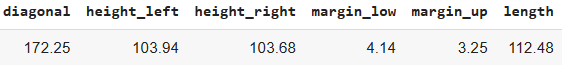
<!-- 1412 -->

##1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi


In [11]:
import pandas as pd
import math

# Memuat dataset
url = "https://raw.githubusercontent.com/Baridwan01/Posttest2Datmin/main/Dataset/deteksi_uang_palsu_knn.csv"
df2 = pd.read_csv(url)

# Mendefinisikan data poin
data_point = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]

# Menghitung jarak Eucladean diantara data poin dan setiap baris pada dataset
distances = []
for index, row in df2.iterrows():
    distance = math.sqrt((row['diagonal'] - data_point[0])**2 +
                         (row['height_left'] - data_point[1])**2 +
                         (row['height_right'] - data_point[2])**2 +
                         (row['margin_low'] - data_point[3])**2 +
                         (row['margin_up'] - data_point[4])**2 +
                         (row['length'] - data_point[5])**2)
    distances.append(distance)

# Tampilkan jarak
table = pd.DataFrame({'Distance': distances})

print(df2)
print("\n", table)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length  
0  113.02  
1  113.74  
2  113.12  
3  113.30  
4  113.46  
5  110.94  
6  111.67  
7  112.12  
8  111.04  
9  110.98  

    Distance
0  0.6

## 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)


In [12]:
# Tambahkan jarak sebagai kolom baru ke dataframe
df2['Distance'] = distances

# Hitung nilai k (jumlah nilai terdekat untuk dipertimbangkan)
k = round(math.sqrt(len(df2)))

# Urutkan dataframe berdasarkan kolom 'Distance' dan dapatkan k baris teratas
nearest_neighbors = df2.sort_values(by='Distance').head(k)

# Print nilai terdekat
print(nearest_neighbors)


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   

   length  Distance  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


## 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak



In [13]:
# Mendapatkan kolom target dari dataframe terdekat_tetangga
targets = nearest_neighbors['is_genuine']

# Tentukan target yang paling banyak
prediction = targets.value_counts().idxmax()

# Print prediksi
print("Prediksi:", prediction)


Prediksi: True


# (3) Analisis

> Nama : Zaki Baridwan Sauqi

> Nim : 21091116036


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Tema = Ritel

## Penjualan Tiket Bioskop

## Business Understanding

Business Understanding:
Dataset ini berisi informasi tentang penjualan tiket bioskop dari beberapa teater selama beberapa waktu. Tujuan dari analisis dataset ini adalah untuk membantu perusahaan bioskop dalam memahami tren penjualan tiket dan perilaku konsumen mereka. Data ini dapat memberikan wawasan tentang preferensi konsumen terhadap film tertentu dan waktu yang paling populer untuk menonton. Analisis ini dapat membantu perusahaan bioskop untuk mengambil keputusan tentang jadwal tayang film dan strategi pemasaran.

Data Understanding:
Dataset ini terdiri dari satu file dengan format CSV. Setiap baris pada dataset ini mewakili satu transaksi penjualan tiket untuk satu film pada suatu waktu tertentu. Kolom pada dataset ini antara lain:

- Cinema: nama bioskop
- Movie: judul film
- Day: hari penjualan tiket
- Time: waktu tayang film
- Genre: genre film
- Age_Restriction: batasan usia penonton
- Price: harga tiket
- Sold: jumlah tiket yang terjual

Dataset ini memiliki 50.000 baris dan 8 kolom. Tidak ada nilai yang hilang pada dataset ini, sehingga tidak perlu dilakukan pembersihan data. Namun, pada kolom Day dan Time perlu dilakukan konversi tipe data ke dalam format yang sesuai dengan kebutuhan analisis. Selain itu, perlu diperhatikan bahwa data ini hanya mencakup beberapa teater dan tidak mewakili penjualan tiket di seluruh industri bioskop.

## Analisis dengan menggunakan struktur CRISP-DM

In [14]:
df3 = pd.read_csv("https://raw.githubusercontent.com/Baridwan01/Posttest2Datmin/main/Dataset/cinemaTicket_Ref.csv")
df3

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1492,291,600000,10,0,3,1.96,60000.0,10,510.204082,2018-06-24,6,2,24
215,1492,431,300000,3,0,2,5.77,100000.0,3,51.993068,2018-06-24,6,2,24
216,1492,324,140000,2,0,2,0.49,70000.0,2,408.163265,2018-06-24,6,2,24
217,1492,243,120000,2,0,4,0.27,60000.0,2,740.740741,2018-06-24,6,2,24


## Data Preparation

In [51]:
#Load data
url = 'https://raw.githubusercontent.com/Baridwan01/Posttest2Datmin/main/Dataset/cinemaTicket_Ref.csv'
df = pd.read_csv(url, sep=',')
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1492,291,600000,10,0,3,1.96,60000.0,10,510.204082,2018-06-24,6,2,24
215,1492,431,300000,3,0,2,5.77,100000.0,3,51.993068,2018-06-24,6,2,24
216,1492,324,140000,2,0,2,0.49,70000.0,2,408.163265,2018-06-24,6,2,24
217,1492,243,120000,2,0,4,0.27,60000.0,2,740.740741,2018-06-24,6,2,24


In [52]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(['ticket_use'], axis=1)
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1492,291,600000,10,0,3,1.96,60000.0,510.204082,2018-06-24,6,2,24
215,1492,431,300000,3,0,2,5.77,100000.0,51.993068,2018-06-24,6,2,24
216,1492,324,140000,2,0,2,0.49,70000.0,408.163265,2018-06-24,6,2,24
217,1492,243,120000,2,0,4,0.27,60000.0,740.740741,2018-06-24,6,2,24


In [55]:
# Mengubah format tanggal menjadi datetime
df['date'] = pd.to_datetime(df['date'])

In [58]:
# Mengubah tipe data kolom Jumlah Beli menjadi integer
df['ticket_price'] = df['ticket_price'].astype(int)
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1492,291,600000,10,0,3,1.96,60000,510.204082,2018-06-24,6,2,24
215,1492,431,300000,3,0,2,5.77,100000,51.993068,2018-06-24,6,2,24
216,1492,324,140000,2,0,2,0.49,70000,408.163265,2018-06-24,6,2,24
217,1492,243,120000,2,0,4,0.27,60000,740.740741,2018-06-24,6,2,24


In [59]:
# Membuat kolom baru berdasarkan tanggal
df['day'] = df['date'].dt.day_name()
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000,610.328638,2018-05-05,5,2,Saturday
1,1492,352,3360000,42,0,5,8.08,80000,519.801980,2018-05-05,5,2,Saturday
2,1492,489,2560000,32,0,4,20.00,80000,160.000000,2018-05-05,5,2,Saturday
3,1492,429,1200000,12,0,1,11.01,100000,108.991826,2018-05-05,5,2,Saturday
4,1492,524,1200000,15,0,3,16.67,80000,89.982004,2018-05-05,5,2,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1492,291,600000,10,0,3,1.96,60000,510.204082,2018-06-24,6,2,Sunday
215,1492,431,300000,3,0,2,5.77,100000,51.993068,2018-06-24,6,2,Sunday
216,1492,324,140000,2,0,2,0.49,70000,408.163265,2018-06-24,6,2,Sunday
217,1492,243,120000,2,0,4,0.27,60000,740.740741,2018-06-24,6,2,Sunday


In [61]:
# Mengisi missing value pada kolom Total Harga dengan nilai rata-rata
mean_total_sales = df['total_sales'].mean()
df['total_sales'] = df['total_sales'].fillna(mean_total_sales)